### Import python libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

### Assign variable to imported csv files 

In [2]:
ph_tmaxdf = pd.read_csv("tmax_phoenix.csv")

ph_rhumdf = pd.read_csv("rmin_phoenix.csv")

#print(ph_tmaxdf)

## Make array for yrs, max temps, relative humidity, days of year

In [3]:
#pull out yr vector for ph
#same num of yrs for both rhum and tmax

phyrs = np.array(ph_tmaxdf.Years)

#pull out the rest of the data for ph
phtmax = np.array(ph_tmaxdf.iloc[:,1:]) #all of x, all of y skip yrs

#rel hum
phrhum = np.array(ph_rhumdf.iloc[:,1:])

#day of year vector
phdoy = np.arange(1, 366+1) #day one until day 336


#create a storage variable for our annual mean Tmax values

phtmax_mean_allyrs = np.zeros((phyrs.size)) #storage variable of zeros the size of yrs

for i_phyrs in enumerate(phyrs):
    
    #location of all data
    loc_phyrs = i_phyrs[0] #do it for every yr starting at the 1st
    
    #pull out temp data for the current yr
    phtmax_phyrs = phtmax[loc_phyrs,:]
    
    
    #calc the mean
    phtmax_mean = np.nanmean(phtmax_phyrs)
    
    #store the current yr estimate in our full array
    phtmax_mean_allyrs[loc_phyrs] = phtmax_mean

# Overview of seasonality

## Plot Orlando mean maximum temperature

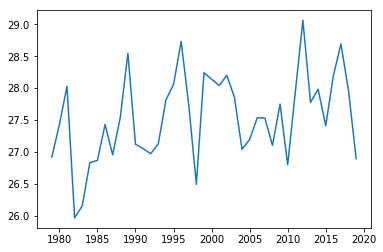

In [4]:
plt.plot(phyrs,phtmax_mean_allyrs) #draw trend lines

## Orlando median tmax temps

(366,)


/Users/fiker/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 1 results
  r = func(a, **kwargs)


Text(0.5, 1.0, 'Phoenix Daily Median Maximum Temperature')

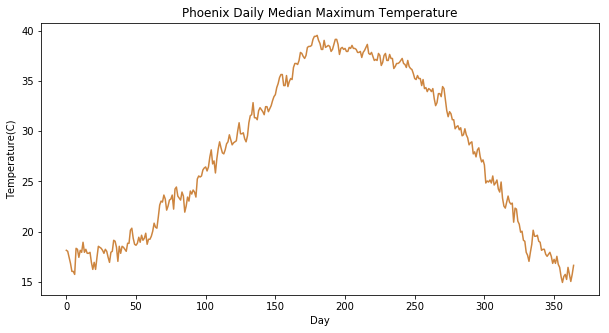

In [5]:
plt.figure(figsize=(10,5))

phtmax_median= np.median(phtmax,axis=0)

plt.plot(phtmax_median, color= 'peru', label= 'Maximum Temperature')
print((np.median(phtmax,axis=0)).shape)

plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Phoenix Daily Median Maximum Temperature')

## ph rhum temps

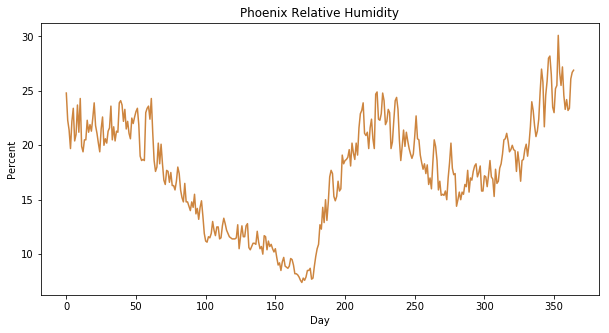

In [6]:
plt.figure(figsize=(10,5))

phrhum_median = np.median(phrhum,axis=0)

plt.plot(phrhum_median, label= 'Relative Humidity', color = 'peru')

plt.xlabel('Day')
plt.ylabel('Percent')
plt.title('Phoenix Relative Humidity')

plt.savefig('relhum_ph.JPEG',format='jpeg')

#more dangerous, susceptible to heat stress.

## Heat Index Calculations

In [7]:
# Input data
tdry = 35  # degrees Celsius
RH   = 20  # percent

# Calculate some parameters
Tr = (0.8841*tdry)+0.19
p  = (0.0196*tdry)+0.9031
es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tdry+273.15))   ) )

# Calculate heat index
Thi = Tr + (tdry-Tr)*(  (RH*es)/(100*1.6) )**p

# Print summary
print('Dry Bulb Temp: '+np.str(tdry)+' C')
print('Relative Humidity: '+np.str(RH)+' %')
print('THI feels like Temp: '+np.str(Thi)+' C')

Dry Bulb Temp: 35 C
Relative Humidity: 20 %
THI feels like Temp: 33.4694707635862 C


In [8]:
def heatindex(tmax,rmin):   #tmax and rhum
        # Calculate some parameters  
        Tr = (0.8841*tmax)+0.19
        p  = (0.0196*tmax)+0.9031   
        es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tmax+273.15))   ) )    
        #Calculate heat index    
        Thi = Tr + (tmax-Tr)*(  (rmin*es)/(100*1.6) )**p    
       
        return Thi
    #Calculate for one set of values
        THI_tmax = heatindex(30,30)
        print("Heat index is: ", THI_tmax)
        # Calculate for a while year
        THI_tmax = heatindex(year_tmax,year_rmin)
        print(THI_tmax)

## phando THI

### Calculate heat indicies, median of heat indicies

In [9]:
THI_tmax_ph = heatindex(phtmax, phrhum)
#print(THI_tmax_ph)
THI_tmax_ph_median = np.median(heatindex(phtmax,phrhum), axis=0)

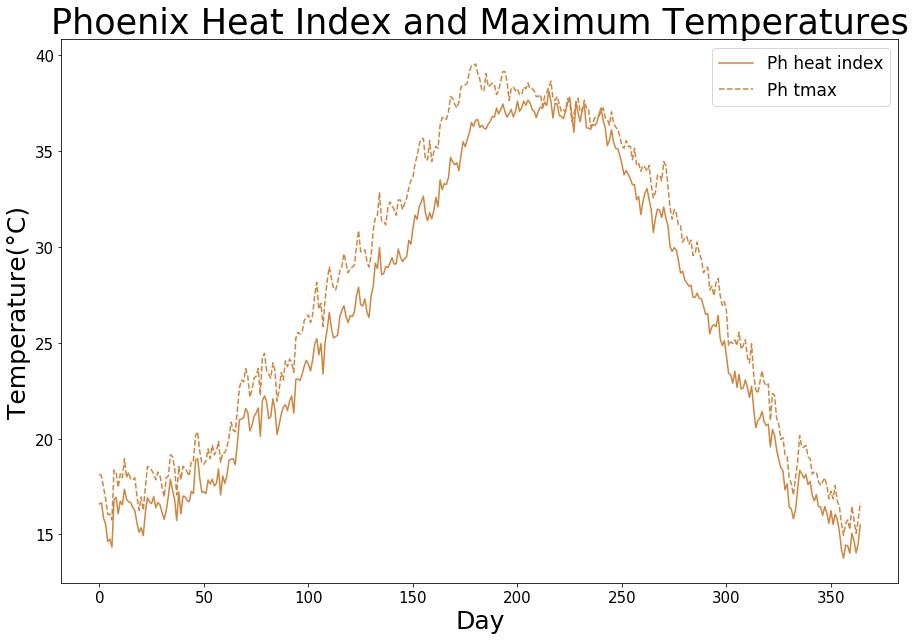

In [21]:
plt.figure(figsize=(15,10))

plt.plot(THI_tmax_ph_median, color= 'peru', label= 'Ph heat index')
plt.plot(phtmax_median,'--', color= 'peru', label= 'Ph tmax')

plt.rc('legend',fontsize=17) # using a size in points; SET DEFAULT USING RC
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.legend()
plt.xlabel('Day', size=25)
plt.ylabel('Temperature(°C)', size=25)
plt.title('Phoenix Heat Index and Maximum Temperatures', size=35)
plt.savefig('thi_tmax_ph.JPEG',format='jpeg')

## Number of days where temperature was above 33°C

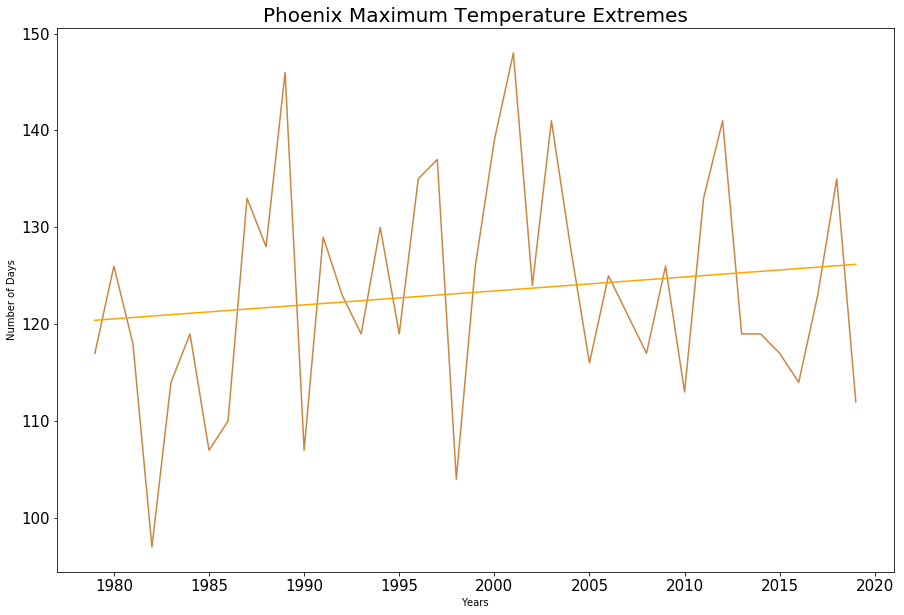

In [11]:
ph_heatdays = np.zeros((phyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_phyrs in enumerate(phyrs):
     
    # Pull out current year temperatures
    curr_year = phtmax[i_phyrs[0],:]
    
    ph_above_thresh = sum(i>=33 for i in curr_year)
    
    
    # Store value
    ph_heatdays[i_phyrs[0]] = ph_above_thresh 

# Calculate the regression
regstat_ehd = stats.linregress(phyrs,ph_heatdays)
reg_slope_ehd = regstat_ehd.slope      # slope of the regression line
reg_int_ehd   = regstat_ehd.intercept  # intercept of the regression line
reg_pval_ehd  = regstat_ehd.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_ehd = (phyrs*reg_slope_ehd)+reg_int_ehd
    
plt.figure(figsize=(15,10))
plt.plot(phyrs,ph_heatdays, color='peru')
plt.plot(phyrs, y_pred_ehd, color = 'orange')
plt.title('Phoenix Maximum Temperature Extremes', size=20)
plt.xlabel('Years')
plt.ylabel('Number of Days')
plt.savefig('abovethresh_ph.JPEG',format='jpeg')
#trend line

## Timing of first, last day above thresh and length of heat exposure season

## Calculate for tmax temperatures

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.


(Second day Ph) pval: 0.04341458422521256 y-intercept:  -295.25557491289163 slope: 0.2879790940766549
(First day Ph) pval: 0.42509278545191953 y-intercept:  494.57944250871077 slope: -0.1905923344947735
(Length Ph) pval: 0.06053399117103388 y-intercept:  -789.8350174216025 slope: 0.4785714285714285
pval: 0.06053399117103388 slope: 0.4785714285714285


<Figure size 432x288 with 0 Axes>

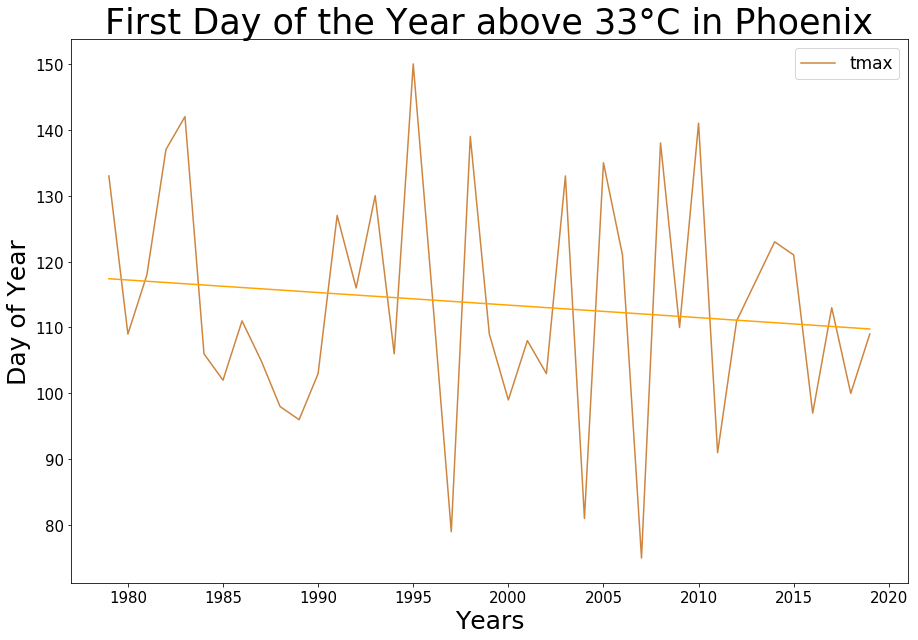

<Figure size 432x288 with 0 Axes>

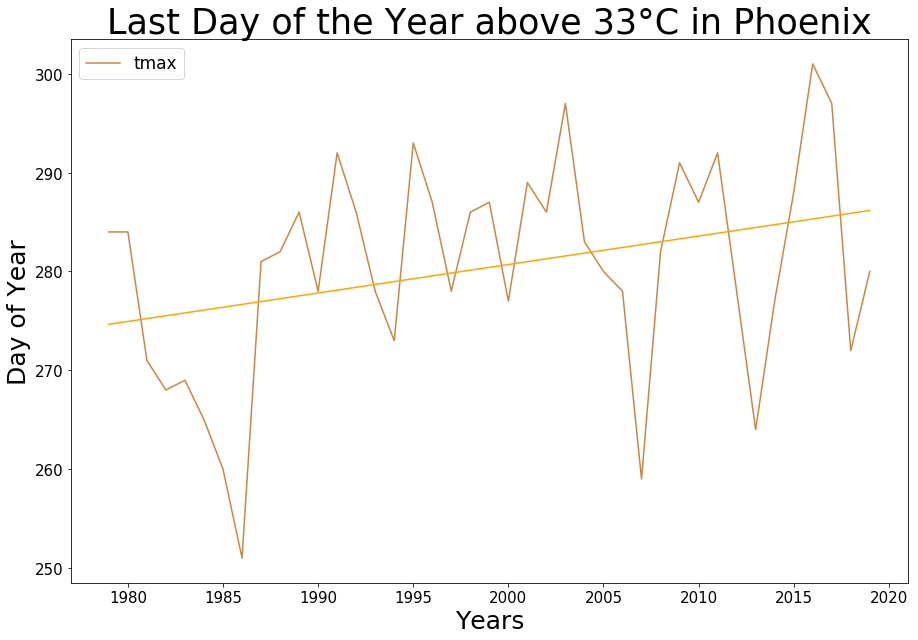

<Figure size 432x288 with 0 Axes>

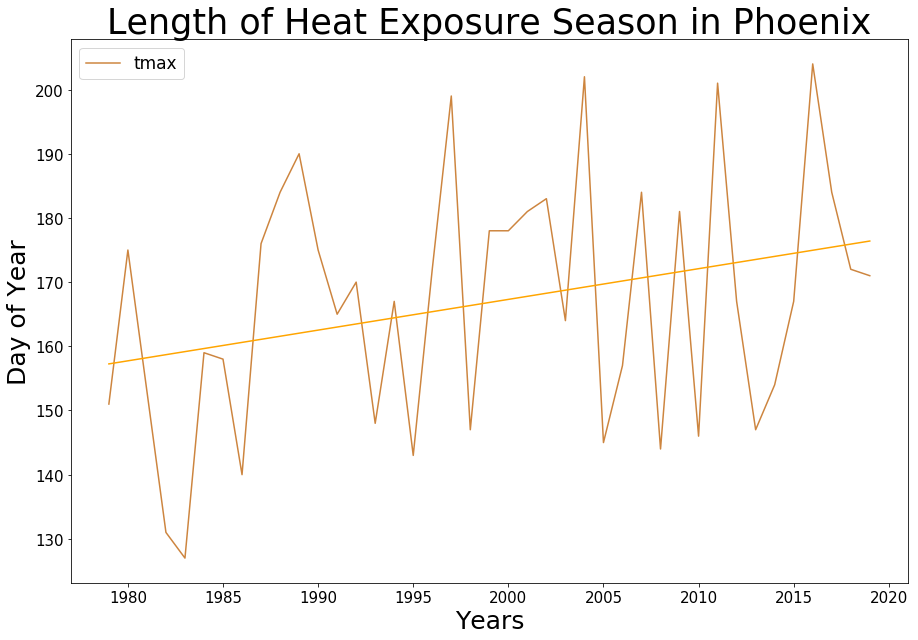

In [22]:
# Setup an array to store all the calculations
day1_t33_ph = np.zeros((phyrs.size))   # The first day of the year with Tmax>33
day2_t33_ph = np.zeros((phyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop
for i_yr in enumerate(phyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_ph = phtmax[i_yr[0],:].copy()
    # Find location of ALL days with TMAX>=33
    loc_days_ph = np.where(curr_yr_ph>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_ph)==0:
        t33_d1 = np.nan
        t33_d2 = np.nan
    else:
        t33_d1 = np.min(loc_days_ph)+1        
        t33_d2 = np.max(loc_days_ph)+1        
    # Put it in the storage array
    day1_t33_ph[i_yr[0]] = t33_d1.copy()
    day2_t33_ph[i_yr[0]] = t33_d2.copy()

regstat_day2_t33= stats.linregress(phyrs,day2_t33_ph)
reg_slope_d2 = regstat_day2_t33.slope      # slope of the regression line
reg_int_d2   = regstat_day2_t33.intercept  # intercept of the regression line
reg_pval_d2  = regstat_day2_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day2 = (phyrs*reg_slope_d2)+reg_int_d2

print('(Second day Ph) pval:', reg_pval_d2,'y-intercept: ',reg_int_d2, 'slope:', reg_slope_d2)

# Calculate the regression
regstat_day1_t33= stats.linregress(phyrs,day1_t33_ph)
reg_slope_d1 = regstat_day1_t33.slope      # slope of the regression line
reg_int_d1   = regstat_day1_t33.intercept  # intercept of the regression line
reg_pval_d1  = regstat_day1_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day1 = (phyrs*reg_slope_d1)+reg_int_d1

print('(First day Ph) pval:', reg_pval_d1,'y-intercept: ',reg_int_d1, 'slope:', reg_slope_d1)

length_t33 = day2_t33_ph-day1_t33_ph
# Calculate the regression
regstat_len_t33= stats.linregress(phyrs,length_t33)
reg_slope = regstat_len_t33.slope      # slope of the regression line
reg_int   = regstat_len_t33.intercept  # intercept of the regression line
reg_pval  = regstat_len_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred = (phyrs*reg_slope)+reg_int

print('(Length Ph) pval:', reg_pval,'y-intercept: ',reg_int, 'slope:', reg_slope)

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(phyrs,day1_t33_ph, color='peru', label='tmax')
plt.plot(phyrs, y_pred_day1, color = 'orange')
plt.title('First Day of the Year above 33°C in Phoenix', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_first_ph.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(phyrs,day2_t33_ph, color='peru', label='tmax')
plt.plot(phyrs, y_pred_day2, color = 'orange')
plt.title('Last Day of the Year above 33°C in Phoenix', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_last_ph.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(phyrs,day2_t33_ph-day1_t33_ph, color='peru', label='tmax')
plt.plot(phyrs,y_pred,color='orange')
plt.title('Length of Heat Exposure Season in Phoenix', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_heatseason_ph.JPEG',format='jpeg')

print('pval:', reg_pval, 'slope:', reg_slope)



## Calculate for heat indicies

pval:  0.6826944723611852 slope:  0.08902439024390232


<Figure size 432x288 with 0 Axes>

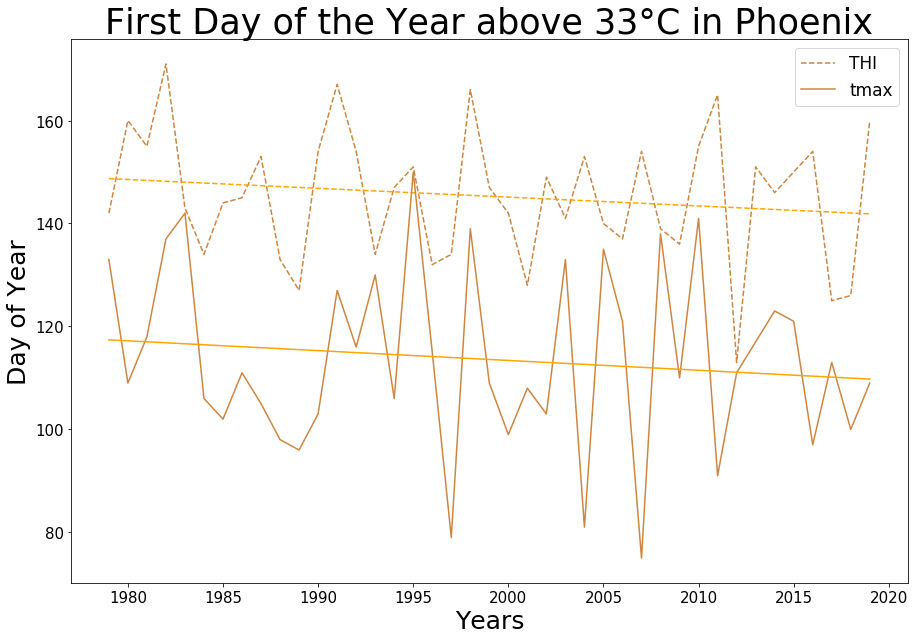

<Figure size 432x288 with 0 Axes>

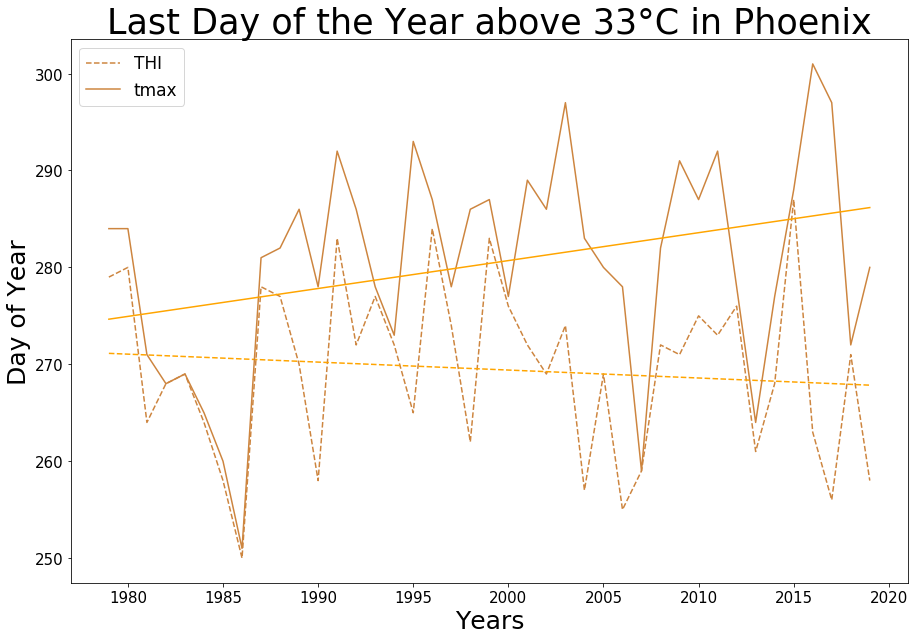

<Figure size 432x288 with 0 Axes>

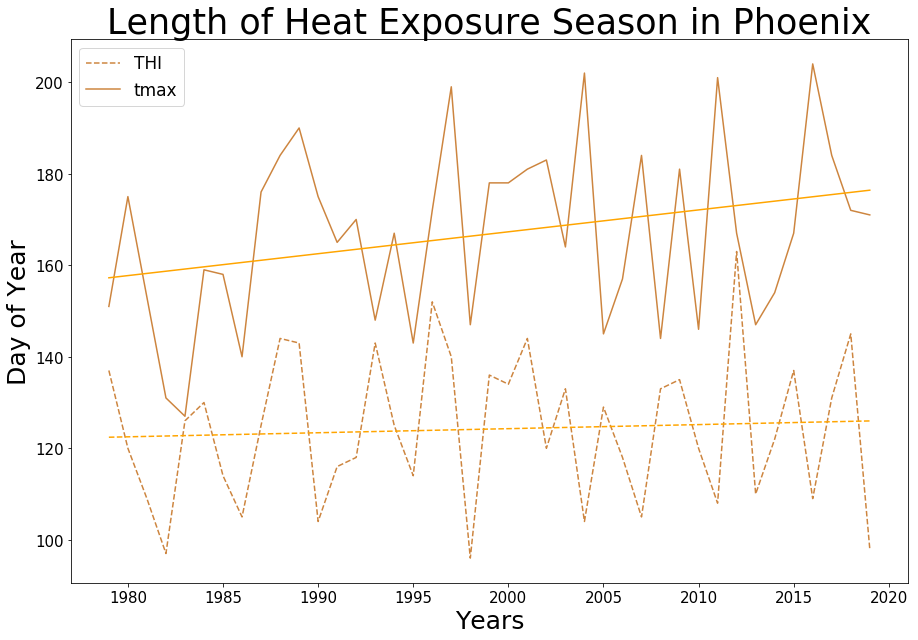

In [23]:
# Setup an array to store all the calculations
day1_t33_phTHI = np.zeros((phyrs.size))   # The first day of the year with Tmax>33
day2_t33_phTHI = np.zeros((phyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop


for i_yr in enumerate(phyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_ph = THI_tmax_ph[i_yr[0],:]
    # Find location of ALL days with TMAX>=33
    loc_days_ph = np.where(curr_yr_ph>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_ph)==0:
        t33_d1_ph = np.nan
        t33_d2_ph = np.nan
    else:
        t33_d1_ph = np.min(loc_days_ph)+1        
        t33_d2_ph = np.max(loc_days_ph)+1        
    # Put it in the storage array
    day1_t33_phTHI[i_yr[0]] = t33_d1_ph
    day2_t33_phTHI[i_yr[0]] = t33_d2_ph

heatexp_ph=day2_t33_phTHI-day1_t33_phTHI #heat exposure period

length_t33THI = day2_t33_phTHI-day1_t33_phTHI

regstat_day2_t33THI= stats.linregress(phyrs,day2_t33_phTHI)
reg_slope_d2THI = regstat_day2_t33THI.slope      # slope of the regression line
reg_int_d2THI   = regstat_day2_t33THI.intercept  # intercept of the regression line
reg_pval_d2THI  = regstat_day2_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day2THI = (phyrs*reg_slope_d2THI)+reg_int_d2THI

# Calculate the regression
regstat_day1_t33THI= stats.linregress(phyrs,day1_t33_phTHI)
reg_slope_d1THI = regstat_day1_t33THI.slope      # slope of the regression line
reg_int_d1THI  = regstat_day1_t33THI.intercept  # intercept of the regression line
reg_pval_d1THI  = regstat_day1_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day1THI = (phyrs*reg_slope_d1THI)+reg_int_d1THI

# Calculate the regression
regstat_len_t33THI = stats.linregress(phyrs,length_t33THI)
reg_slopeTHI = regstat_len_t33THI.slope      # slope of the regression line
reg_intTHI   = regstat_len_t33THI.intercept  # intercept of the regression line
reg_pvalTHI  = regstat_len_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_predTHI = (phyrs*reg_slopeTHI)+reg_intTHI



plt.figure()
plt.figure(figsize=(15,10))
plt.plot(phyrs,day1_t33_phTHI,'--', color='peru', label ='THI')
plt.plot(phyrs, y_pred_day1THI,'--', color='orange')
plt.plot(phyrs,day1_t33_ph, color='peru', label='tmax')
plt.plot(phyrs, y_pred_day1, color = 'orange')
plt.title('First Day of the Year above 33°C in Phoenix', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_firstTHI_ph.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(phyrs,day2_t33_phTHI,'--', color='peru', label ='THI')
plt.plot(phyrs, y_pred_day2THI,'--', color='orange')
plt.plot(phyrs,day2_t33_ph, color='peru', label='tmax')
plt.plot(phyrs, y_pred_day2, color = 'orange')
plt.title('Last Day of the Year above 33°C in Phoenix', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_lastTHI_ph.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(phyrs,heatexp_ph,'--', color='peru', label ='THI')
plt.plot(phyrs, y_predTHI,'--', color='orange')
plt.plot(phyrs,day2_t33_ph-day1_t33_ph, color='peru', label='tmax')
plt.plot(phyrs,y_pred,color='orange')
plt.title('Length of Heat Exposure Season in Phoenix', size=35) #Heat index as title
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_heatseasonTHI_ph.JPEG',format='jpeg')

print('pval: ',reg_pvalTHI, 'slope: ',reg_slopeTHI)

In [14]:
#humidity had a greater impact in more recent years as indicated by the disparity that becomes greater in more recent years.

In [15]:
#d1 / 1st day
print('d1 THI 2050: ', 2050*reg_slope_d1+reg_int_d1)
print('d1 tmax 2050: ',2050*reg_slope_d1THI+reg_int_d1THI)

#d2 / last day
print('d2 THI 2050: ', 2050*reg_slope_d2+reg_int_d2)
print('d2 tmax 2050: ',2050*reg_slope_d2THI+reg_int_d2THI)

#heat exp season
print('len THI 2050: ', 2050*reg_slope+reg_int)
print('len tmax 2050: ',2050*reg_slopeTHI+reg_intTHI)

print('')
print('all stats len tmax', regstat_len_t33) #len tmax
print('all stats len THI', regstat_len_t33THI)
print('')
print('all stats d2 tmax', regstat_day1_t33) #d1 tmax
print('all stats d2 THI', regstat_day1_t33THI) #d1 THI
print()
print('all stats d1 tmax', regstat_day1_t33)#len tmax
print('all stats d1 THI', regstat_day1_t33THI)#len THI
print()
#print('EXP 2019: tmax: ', heatexp_hou[-1],'2019 THI: ', heatexp_houTHI[-1])
print('EXP 2019: THI: ', heatexp_ph[-1],'2019 tmax: ', length_t33[-1]) #variables switch
print()
print('   d1 2019: tmax: ', day1_t33_ph[-1],'2019 THI: ', day1_t33_phTHI[-1])
print()
print('   d2 2019: tmax: ', day2_t33_ph[-1],'2019 THI: ', day2_t33_phTHI[-1])
print()

#d1 / 1st day
print('d1 tmax 2050: ', 2050*reg_slope_d1+reg_int_d1)
print('d1 THI 2050: ',2050*reg_slope_d1THI+reg_int_d1THI)
print()
#d2 / last day
print('d2 tmax 2050: ', 2050*reg_slope_d2+reg_int_d2)
print('d2 THI 2050: ',2050*reg_slope_d2THI+reg_int_d2THI)
print()
#heat exp season
print('len tmax 2050: ', 2050*reg_slope+reg_int)
print('len THI 2050: ',2050*reg_slopeTHI+reg_intTHI)

d1 THI 2050:  103.8651567944251
d1 tmax 2050:  136.56759581881533
d2 THI 2050:  295.1015679442509
d2 tmax 2050:  265.3029616724738
len THI 2050:  191.23641114982593
len tmax 2050:  128.73536585365852

all stats len tmax LinregressResult(slope=0.4785714285714285, intercept=-789.8350174216025, rvalue=0.2956721984885786, pvalue=0.06053399117103388, stderr=0.24759334015946546)
all stats len THI LinregressResult(slope=0.08902439024390232, intercept=-53.76463414634125, rvalue=0.06580797417195405, pvalue=0.6826944723611852, stderr=0.2161502504385659)

all stats d2 tmax LinregressResult(slope=-0.1905923344947735, intercept=494.57944250871077, rvalue=-0.1280119101638047, pvalue=0.42509278545191953, stderr=0.23644757658072244)
all stats d2 THI LinregressResult(slope=-0.1710801393728222, intercept=487.2818815331009, rvalue=-0.16026934848591032, pvalue=0.31683756922639733, stderr=0.16871987036931188)

all stats d1 tmax LinregressResult(slope=-0.1905923344947735, intercept=494.57944250871077, rvalu

## Cooling degree days

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


(41,)
147081.2200000001
pval:  0.002665851615648054 slope:  7.973909407665511 int -12352.498076655062
2050:  3994.0162090592366
2019:  3462.3800000000024 3462.3800000000024


<Figure size 432x288 with 0 Axes>

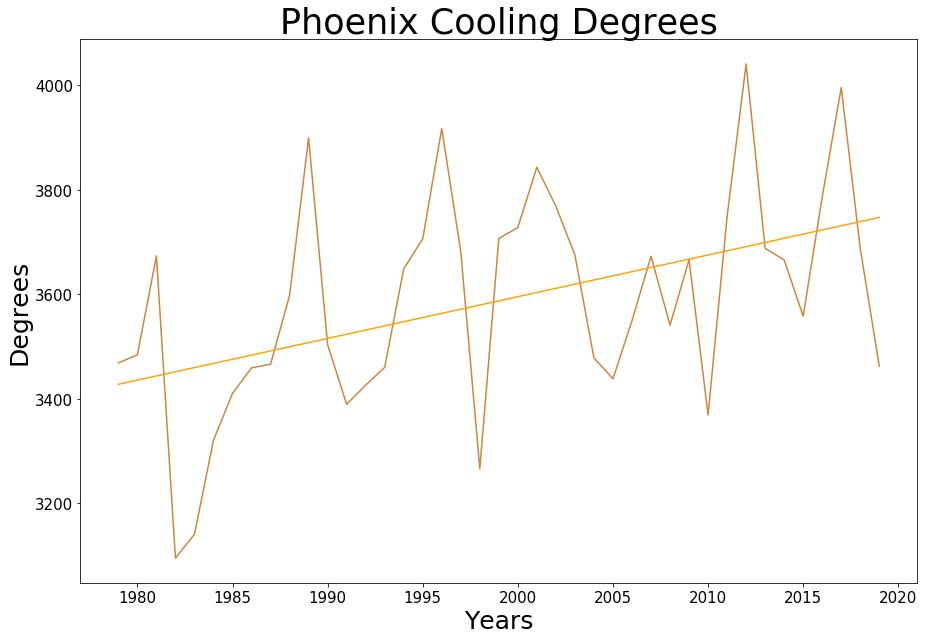

In [24]:
# Calculate the cooling degree days.
# Set the threshold for a CDD
thresh_cdd=18.33

# Convert individual days into CDD
year_cdd_ph = phtmax-thresh_cdd
i_noncdd_ph = np.where(year_cdd_ph<=0)
year_cdd_ph[i_noncdd_ph]=0

sumcdd_ph = np.nansum(year_cdd_ph, axis=1)

# Calculate the regression
regstat_CDD= stats.linregress(phyrs,sumcdd_ph)
reg_slopeCDD = regstat_CDD.slope      # slope of the regression line
reg_intCDD   = regstat_CDD.intercept  # intercept of the regression line
reg_pvalCDD  = regstat_CDD.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_cdd = (phyrs*reg_slopeCDD)+reg_intCDD

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Phoenix Cooling Degrees', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Degrees', size=25)
plt.plot(phyrs,sumcdd_ph, color='peru')
plt.plot(phyrs, y_pred_cdd, color='orange')
plt.savefig('CDD_ph.JPEG',format='jpeg')

print(sumcdd_ph.shape)
# Find the location of all the cooling degree days
# Use the locations
year_cumcdd = np.sum(year_cdd_ph[i_noncdd_ph])
print(np.sum(sumcdd_ph))

print('pval: ',reg_pvalCDD, 'slope: ',reg_slopeCDD, 'int', reg_intCDD)
#y=mx+b
print('2050: ',reg_slopeCDD*2050+(-12352.498076655062))
print('2019: ', sumcdd_ph[-1], sumcdd_ph[40])

In [17]:
#trend lines, do calc for ehd for heat index, replicate for other cities